# 线性回归策略
*用线性回归交易*

## 目录

- 什么是线性回归?
- Slope和intercept是什么?
- Confidence Band是怎么算的？
- 如何用线性回归做策略?

## 什么是线性回归?
在统计学中，线性回归(Linear Regression)是利用称为线性回归方程的最小平方函数对一个或多个自变量和因变量之间关系进行建模的一种回归分析。

## Slope和intercept是什么?
$y = kx+b$

其中k是slope,而b是intercept

## Confidence Band是怎么算的？
一般是Y加减两个标准差的值

## 如何用线性回归做策略?
1. Buy: 价格大于预测值
2. Buy: 价格大于上方边界
3. Buy: Slope>0
4. Buy: 残差变化率的均线上涨

In [1]:
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib as ta
warnings.filterwarnings('ignore')
# data = pd.Panel({s: pd.read_excel('threesymbol.xlsx', sheetname=s, index_col='datetime') 
#                    for s in ['BTCUSDT.binance', 'EOSUSDT.binance', 'ETHUSDT.binance']})
data = pd.read_excel('three.xlsx', sheetname='BTCUSDT.binance', index_col='datetime')

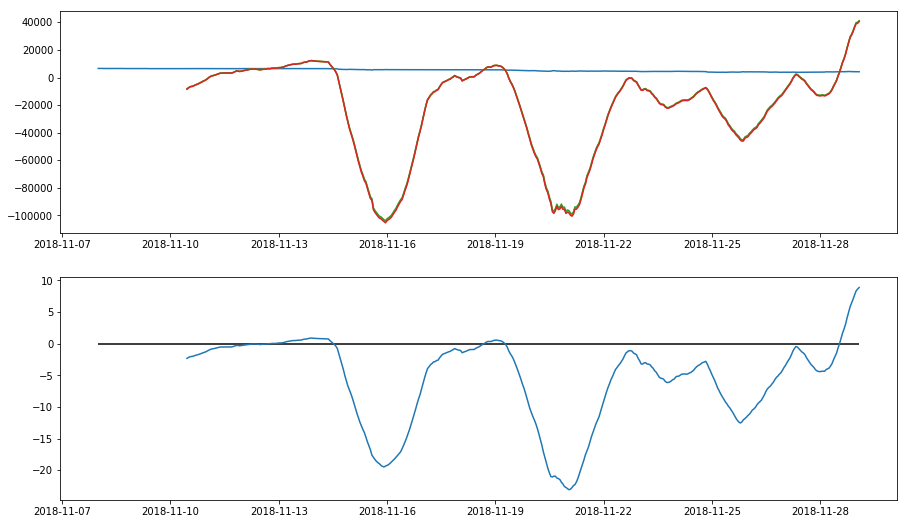

In [2]:
data['BTCUSDT.binance']=data.close.values
slope = ta.abstract.LINEARREG_SLOPE(data, 60,price='BTCUSDT.binance')
intercept = ta.abstract.LINEARREG_INTERCEPT(data, 60,price='BTCUSDT.binance')
prediction = slope*data['BTCUSDT.binance']+intercept
band = 2*ta.abstract.STDDEV(data, 60,price='BTCUSDT.binance')

plt.figure(figsize=(15,9))
plt.subplot(2,1,1)
plt.plot(data['BTCUSDT.binance'])
plt.plot(prediction)
plt.plot(prediction+band)
plt.plot(prediction-band)
plt.subplot(2,1,2)
plt.hlines(y=0,xmax=slope.index[-1],xmin=slope.index[0])
plt.plot(slope)
plt.show()

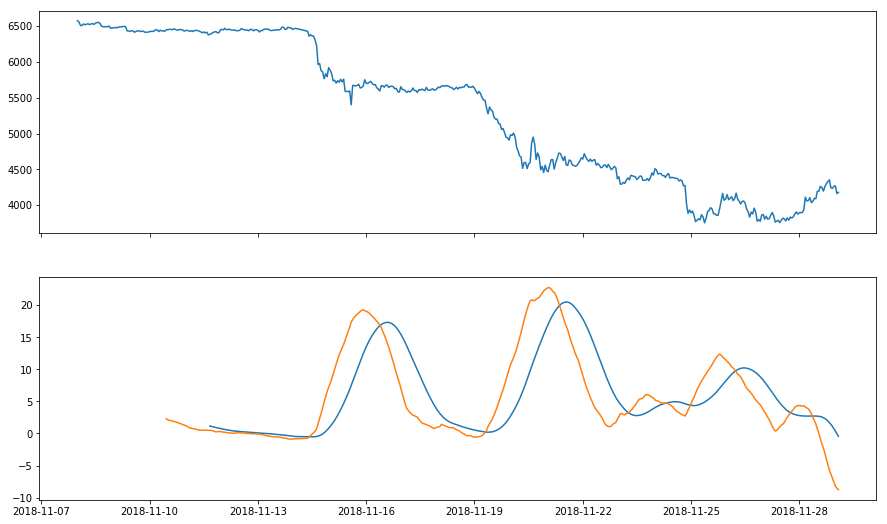

In [3]:
# 残差
residual = (data['BTCUSDT.binance']-prediction)/data['BTCUSDT.binance']
MA_R = pd.Series(ta.MA(residual.values, 30),index=residual.index)

f,(a1,a2)=plt.subplots(2,1,sharex=True,figsize=(15,9))
a1.plot(data['BTCUSDT.binance'])
a2.plot(MA_R)
a2.plot(residual)
plt.show()

In [ ]:
# 残差变化率的均线上涨
    # 策略参数
    LinePeriod = 40
    lots = 1
    stopRatio = 0.08  # 止损比例

    # 策略变量
    maTrend = {}  # 均线趋势，多头1，空头-1
    transactionPrice = {}
    #设置变量
    self.setArrayManagerSize(200)
    self.maTrend = {s: 0 for s in self.symbolList}
    self.transactionPrice = {s: 0 for s in self.symbolList}
    
            # 持有多头仓位
        if self.posDict[symbol + "_LONG"] > 0:
            if (bar.close < self.transactionPrice[symbol] * (1 - self.stopRatio)) or \
                    (bar.close > self.transactionPrice[symbol] * (1 + 2 * self.stopRatio)):
                self.sell(symbol, bar.close * 0.98, self.posDict[symbol + "_LONG"])

        # 持有空头仓位
        elif self.posDict[symbol + "_SHORT"] > 0:
            if (bar.close > self.transactionPrice[symbol] * (1 + self.stopRatio)) or \
                    (bar.close < self.transactionPrice[symbol] * (1 - 2 * self.stopRatio)):
                self.cover(symbol, bar.close * 1.02, self.posDict[symbol + "_SHORT"])
                
        #信号计算
        slope = ta.LINEARREG_SLOPE(am5.close, self.LinePeriod)
        intercept = ta.LINEARREG_INTERCEPT(am5.close, self.LinePeriod)
        prediction = slope * am5.close + intercept
        residual = (am5.close - prediction) / am5.close
        residual_MA = ta.MA(residual, 20)

        if residual[-1] > residual_MA[-1]:
            self.maTrend[symbol] = 1
        elif residual[-1] < residual_MA[-1]:
            self.maTrend[symbol] = -1
        else:
            self.maTrend[symbol] = 0

        if self.posDict[symbol + "_LONG"] == 0 and self.posDict[symbol + "_SHORT"] == 0:
            if self.maTrend[symbol] == 1:
                self.buy(symbol, bar.close * 1.02, self.lots)
            if self.maTrend[symbol] == -1:
                self.short(symbol, bar.close * 0.98, self.lots)


    # ----------------------------------------------------------------------
    def onTrade(self, trade):
        symbol = trade.vtSymbol
        """收到成交推送（必须由用户继承实现）"""
        # 对于无需做细粒度委托控制的策略，可以忽略onTrade
        self.transactionPrice[symbol] = trade.price